## Loading packages

In [1]:
suppressMessages(library('ggplot2'))
suppressMessages(library('clusterProfiler'))

## GO Pathways

In [34]:
sig.gene <- bitr(rownames(res_chow_fem_trt_vs_control), fromType="SYMBOL",toType="ENTREZID",OrgDb=org.Mm.eg.db)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(rownames(res_chow_fem_trt_vs_control), fromType = "SYMBOL", :
“3.15% of input gene IDs are fail to map...”


In [35]:
ego1 <- enrichGO(gene=sig.gene[,2], OrgDb=org.Mm.eg.db, ont="BP", pAdjustMethod="BH", pvalueCutoff=0.01, readable=TRUE)

In [36]:
df_total <- data.frame(ego1@result$Description[1:20], ego1@result$p.adjust[1:20], ego1@result$Count[1:20])

colnames(df_total) <- c("pathway","padjPath","count")

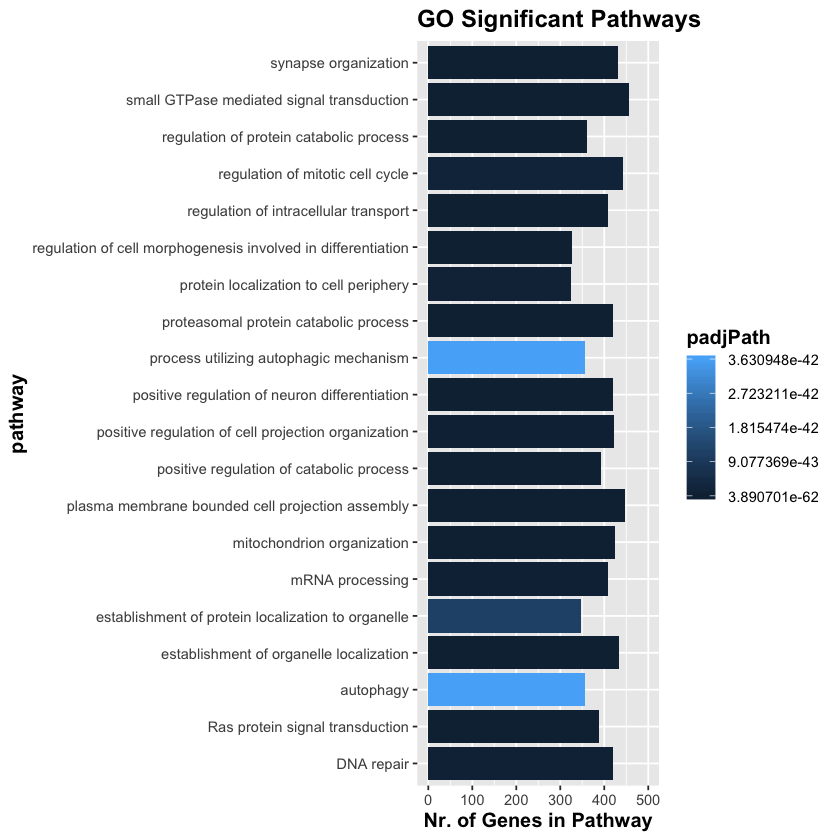

In [37]:
ggplot(df_total, aes(pathway, count))+ geom_bar(stat = "identity", aes(fill = padjPath), position = position_stack(reverse = TRUE)) + coord_flip() +
scale_color_gradient(low="red", high="yellow")+
theme(axis.title=element_text(size=12,face="bold"),title=element_text(size=12,face="bold"))+
ylab("Nr. of Genes in Pathway")+ ggtitle("GO Significant Pathways")+ylim(0,500)

In [38]:
df_total = data.frame()
for(i in 1:20){
    p <- as.data.frame(res_chow_fem_trt_vs_control[which(rownames(res_chow_fem_trt_vs_control)%in%unlist(strsplit(ego1@result$geneID[i],"/"))),c(2,6)])
    p$pathway <- ego1@result$Description[i]
    p$padjPath <- ego1@result$p.adjust[i]
    p$count <- ego1@result$Count[i]
    df_total <- rbind(df_total,p)
}
df_total[is.na(df_total[,2]),2] <- 0.05

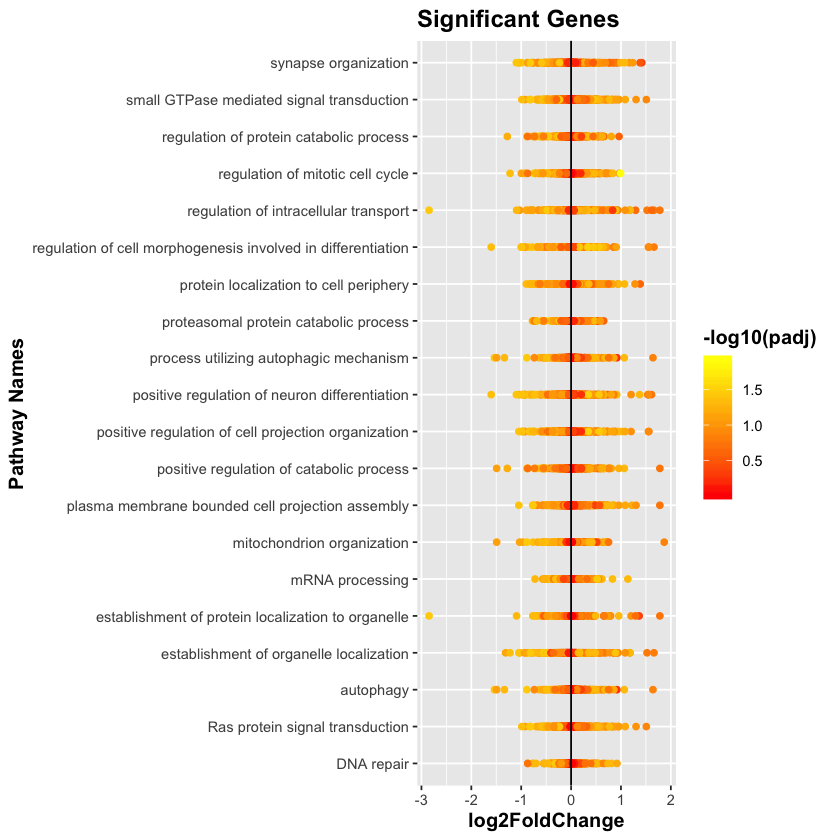

In [39]:
ggplot(df_total, aes(log2FoldChange, pathway)) + scale_color_gradient(low="red", high="yellow") +
        geom_point(aes(color = -log10(padj)))+ geom_vline(xintercept = 0)+
theme(axis.title=element_text(size=12,face="bold"),title=element_text(size=12,face="bold"))+
ylab("Pathway Names")+ggtitle("Significant Genes")